In [1]:
from fastai.tabular.all import *
from fastcore.utils import *
import pandas
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score
from torch.utils.data import Dataset
import torch
import torch.nn
import torch.nn.functional as F
import torch.optim as opt

from utils import *
from nn_architecture import Net
#from utils import *

emb_valid_xs = pd.read_csv("../dataset/emb_valid_xs.csv")
df = pd.read_csv("../dataset/df.csv")
emb_xs = pd.read_csv("../dataset/emb_xs.csv")

train_loader, valid_loader = pandas_to_tensor(df, emb_xs, emb_valid_xs)


nb_clust=1

# -1 cause we remove the target
net = Net(32, nb_clust)
print(net)

max_epochs = 50
#loss_fct = nn.CrossEntropyLoss()
loss_fct = nn.BCEWithLogitsLoss()
l_loss = list()
l_loss_test = list()
l_roc_train = list()
l_roc_test = list()

optim = opt.Adam(net.parameters(), lr=0.01)


for epoch in tqdm(range(max_epochs)):
    t0 = datetime.now()
    net.train()
    epoch_loss = 0
    epoch_auc = 0
    for batch, (x, y) in enumerate(train_loader):
        
        optim.zero_grad()
        
        # Predict soft-targets and embeddings
        output = net(x, 1)
        
        loss = loss_fct(output, y)
        auc = roc_auc_score(y.detach().numpy(), torch.sigmoid(output).detach().numpy())
        loss.backward()
        
        optim.step()
        
        #l_loss.append(loss.item())
        #l_roc_train.append(roc_auc_score(y.detach().numpy(), torch.sigmoid(output).detach().numpy()))
        epoch_loss += loss.item()
        epoch_auc += auc
        
    print(f'Epoch {epoch+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | AUC: {epoch_auc/len(train_loader):.3f}')        
        


Net(
  (fc1): Linear(in_features=32, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=1, bias=True)
  (bn1): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (relu): ReLU()
)


  2%|▉                                           | 1/50 [00:03<02:41,  3.29s/it]

Epoch 000: | Loss: 0.58343 | AUC: 0.501


  4%|█▊                                          | 2/50 [00:06<02:35,  3.24s/it]

Epoch 001: | Loss: 0.57841 | AUC: 0.503


  6%|██▋                                         | 3/50 [00:09<02:31,  3.23s/it]

Epoch 002: | Loss: 0.57816 | AUC: 0.502


  8%|███▌                                        | 4/50 [00:12<02:27,  3.21s/it]

Epoch 003: | Loss: 0.57810 | AUC: 0.504


 10%|████▍                                       | 5/50 [00:16<02:24,  3.20s/it]

Epoch 004: | Loss: 0.57810 | AUC: 0.503


 12%|█████▎                                      | 6/50 [00:19<02:20,  3.20s/it]

Epoch 005: | Loss: 0.57810 | AUC: 0.503


 14%|██████▏                                     | 7/50 [00:22<02:17,  3.19s/it]

Epoch 006: | Loss: 0.57810 | AUC: 0.503


 16%|███████                                     | 8/50 [00:25<02:13,  3.19s/it]

Epoch 007: | Loss: 0.57811 | AUC: 0.501


 18%|███████▉                                    | 9/50 [00:28<02:10,  3.18s/it]

Epoch 008: | Loss: 0.57811 | AUC: 0.500


 20%|████████▌                                  | 10/50 [00:31<02:06,  3.17s/it]

Epoch 009: | Loss: 0.57811 | AUC: 0.500


 22%|█████████▍                                 | 11/50 [00:35<02:03,  3.17s/it]

Epoch 010: | Loss: 0.57811 | AUC: 0.500


 24%|██████████▎                                | 12/50 [00:38<02:00,  3.16s/it]

Epoch 011: | Loss: 0.57811 | AUC: 0.500


 26%|███████████▏                               | 13/50 [00:41<01:56,  3.15s/it]

Epoch 012: | Loss: 0.57811 | AUC: 0.500


 28%|████████████                               | 14/50 [00:44<01:53,  3.16s/it]

Epoch 013: | Loss: 0.57811 | AUC: 0.500


 30%|████████████▉                              | 15/50 [00:47<01:50,  3.15s/it]

Epoch 014: | Loss: 0.57811 | AUC: 0.500


 32%|█████████████▊                             | 16/50 [00:50<01:47,  3.15s/it]

Epoch 015: | Loss: 0.57811 | AUC: 0.500


 34%|██████████████▌                            | 17/50 [00:54<01:44,  3.16s/it]

Epoch 016: | Loss: 0.57811 | AUC: 0.500


 36%|███████████████▍                           | 18/50 [00:57<01:40,  3.15s/it]

Epoch 017: | Loss: 0.57811 | AUC: 0.500


 38%|████████████████▎                          | 19/50 [01:00<01:37,  3.16s/it]

Epoch 018: | Loss: 0.57811 | AUC: 0.500


 40%|█████████████████▏                         | 20/50 [01:03<01:35,  3.18s/it]

Epoch 019: | Loss: 0.57811 | AUC: 0.500


 42%|██████████████████                         | 21/50 [01:06<01:31,  3.17s/it]

Epoch 020: | Loss: 0.57811 | AUC: 0.500


 44%|██████████████████▉                        | 22/50 [01:09<01:28,  3.17s/it]

Epoch 021: | Loss: 0.57811 | AUC: 0.500


 46%|███████████████████▊                       | 23/50 [01:13<01:25,  3.16s/it]

Epoch 022: | Loss: 0.57811 | AUC: 0.500


 48%|████████████████████▋                      | 24/50 [01:16<01:22,  3.16s/it]

Epoch 023: | Loss: 0.57811 | AUC: 0.500


 50%|█████████████████████▌                     | 25/50 [01:19<01:19,  3.17s/it]

Epoch 024: | Loss: 0.57811 | AUC: 0.500


 52%|██████████████████████▎                    | 26/50 [01:22<01:15,  3.15s/it]

Epoch 025: | Loss: 0.57811 | AUC: 0.500


 54%|███████████████████████▏                   | 27/50 [01:25<01:12,  3.17s/it]

Epoch 026: | Loss: 0.57811 | AUC: 0.500


 56%|████████████████████████                   | 28/50 [01:28<01:09,  3.17s/it]

Epoch 027: | Loss: 0.57811 | AUC: 0.500


 58%|████████████████████████▉                  | 29/50 [01:32<01:06,  3.17s/it]

Epoch 028: | Loss: 0.57811 | AUC: 0.500


 60%|█████████████████████████▊                 | 30/50 [01:35<01:03,  3.18s/it]

Epoch 029: | Loss: 0.57811 | AUC: 0.500


 62%|██████████████████████████▋                | 31/50 [01:38<01:00,  3.18s/it]

Epoch 030: | Loss: 0.57811 | AUC: 0.500


 64%|███████████████████████████▌               | 32/50 [01:41<00:57,  3.19s/it]

Epoch 031: | Loss: 0.57811 | AUC: 0.500


 66%|████████████████████████████▍              | 33/50 [01:44<00:54,  3.19s/it]

Epoch 032: | Loss: 0.57811 | AUC: 0.500


 68%|█████████████████████████████▏             | 34/50 [01:47<00:50,  3.18s/it]

Epoch 033: | Loss: 0.57811 | AUC: 0.500


 70%|██████████████████████████████             | 35/50 [01:51<00:47,  3.18s/it]

Epoch 034: | Loss: 0.57811 | AUC: 0.500


 72%|██████████████████████████████▉            | 36/50 [01:54<00:44,  3.17s/it]

Epoch 035: | Loss: 0.57811 | AUC: 0.500


 74%|███████████████████████████████▊           | 37/50 [01:57<00:41,  3.15s/it]

Epoch 036: | Loss: 0.57811 | AUC: 0.500


 76%|████████████████████████████████▋          | 38/50 [02:00<00:38,  3.17s/it]

Epoch 037: | Loss: 0.57811 | AUC: 0.500


 78%|█████████████████████████████████▌         | 39/50 [02:03<00:34,  3.17s/it]

Epoch 038: | Loss: 0.57811 | AUC: 0.500


 80%|██████████████████████████████████▍        | 40/50 [02:06<00:31,  3.16s/it]

Epoch 039: | Loss: 0.57811 | AUC: 0.500


 82%|███████████████████████████████████▎       | 41/50 [02:10<00:28,  3.17s/it]

Epoch 040: | Loss: 0.57811 | AUC: 0.500


 84%|████████████████████████████████████       | 42/50 [02:13<00:25,  3.16s/it]

Epoch 041: | Loss: 0.57811 | AUC: 0.500


 86%|████████████████████████████████████▉      | 43/50 [02:16<00:22,  3.15s/it]

Epoch 042: | Loss: 0.57811 | AUC: 0.500


 88%|█████████████████████████████████████▊     | 44/50 [02:19<00:18,  3.16s/it]

Epoch 043: | Loss: 0.57811 | AUC: 0.500


 90%|██████████████████████████████████████▋    | 45/50 [02:22<00:15,  3.15s/it]

Epoch 044: | Loss: 0.57811 | AUC: 0.500


 92%|███████████████████████████████████████▌   | 46/50 [02:25<00:12,  3.15s/it]

Epoch 045: | Loss: 0.57811 | AUC: 0.500


 94%|████████████████████████████████████████▍  | 47/50 [02:28<00:09,  3.16s/it]

Epoch 046: | Loss: 0.57811 | AUC: 0.500


 96%|█████████████████████████████████████████▎ | 48/50 [02:32<00:06,  3.16s/it]

Epoch 047: | Loss: 0.57811 | AUC: 0.500


 98%|██████████████████████████████████████████▏| 49/50 [02:35<00:03,  3.17s/it]

Epoch 048: | Loss: 0.57811 | AUC: 0.500


100%|███████████████████████████████████████████| 50/50 [02:38<00:00,  3.17s/it]

Epoch 049: | Loss: 0.57811 | AUC: 0.500


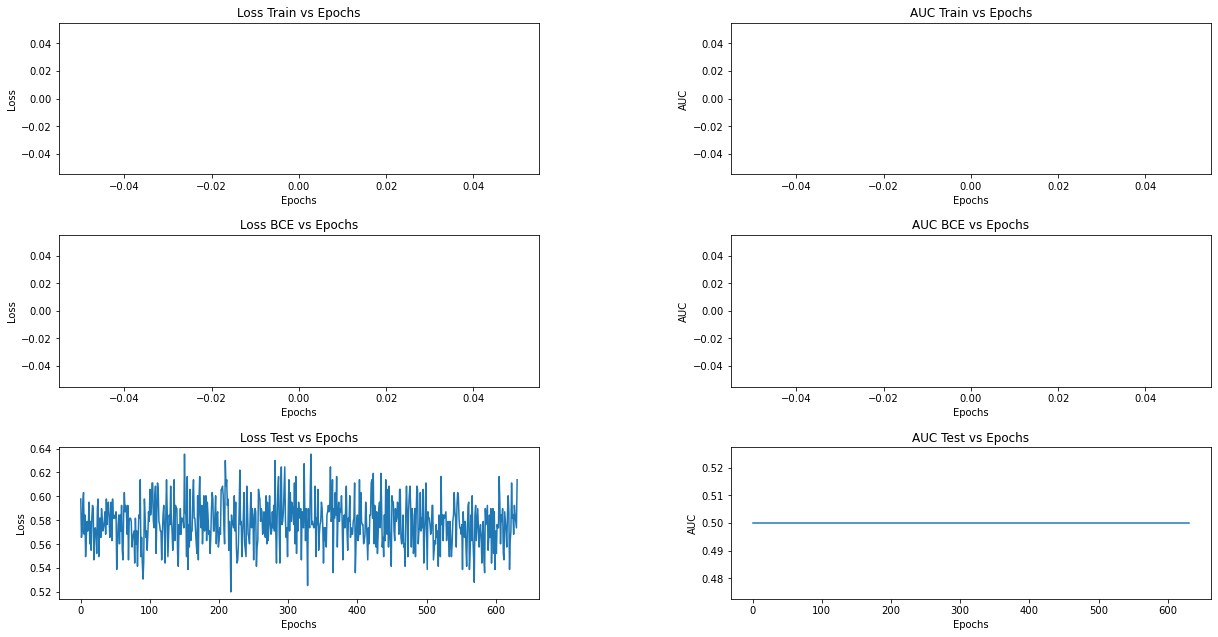

<Figure size 1600x800 with 0 Axes>

In [2]:
# mandatory for the batchnorm
torch.eval()

with torch.no_grad():
    for batch, (x, y) in enumerate(valid_loader):
        output = net(x, 1)

        loss = loss_fct(output, y)
        l_loss_test.append(loss)
        
        l_roc_test.append(roc_auc_score(y.detach().numpy(), torch.sigmoid(output).detach().numpy()))
        
print_scores(l_loss, l_roc_train, l_loss, l_roc_train, l_roc_test, l_loss_test)